In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.vector_ar.var_model import VAR

# data preparation

In [2]:
# read dataset

df = pd.read_csv('datasets/BearingVibration_Dataset.csv', parse_dates=['Unnamed: 0'])
df

,Unnamed: 0,Bearing 1,Bearing 2,Bearing 3,Bearing 4
0,2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
1,2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2,2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
3,2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
4,2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659
...,...,...,...,...,...
977,2004-02-19 05:42:39,0.453335,0.161016,0.137440,0.119047
978,2004-02-19 05:52:39,0.337583,0.132400,0.144992,0.092125
979,2004-02-19 06:02:39,0.351111,0.152266,0.151299,0.100817
980,2004-02-19 06:12:39,0.001857,0.003732,0.003656,0.001786


In [4]:
# information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  982 non-null    datetime64[ns]
 1   Bearing 1   982 non-null    float64       
 2   Bearing 2   982 non-null    float64       
 3   Bearing 3   982 non-null    float64       
 4   Bearing 4   982 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 38.5 KB


In [5]:
# missing values

df.isnull().sum()

Unnamed: 0    0
Bearing 1     0
Bearing 2     0
Bearing 3     0
Bearing 4     0
dtype: int64

There is no missing value in the dataset.

In [6]:
# make new dataframe

new_df = pd.DataFrame()

new_df['Bearing 1'] = df.groupby(df['Unnamed: 0'])['Bearing 1'].sum()
new_df['Bearing 2'] = df.groupby(df['Unnamed: 0'])['Bearing 2'].sum()
new_df['Bearing 3'] = df.groupby(df['Unnamed: 0'])['Bearing 3'].sum()
new_df['Bearing 4'] = df.groupby(df['Unnamed: 0'])['Bearing 4'].sum()

new_df.index = pd.DatetimeIndex(new_df.index.values, freq=new_df.index.inferred_freq)

In [7]:
# generate descriptive statistics

new_df.describe()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
count,982.000000,982.000000,982.000000,982.000000
mean,0.080951,0.078543,0.081351,0.047830
std,0.040200,0.011789,0.011607,0.009549
min,0.001168,0.000767,0.000716,0.001699
25%,0.060773,0.074240,0.076829,0.043951
50%,0.062021,0.075206,0.078187,0.044524
75%,0.083277,0.077458,0.080575,0.048130
max,0.453335,0.161016,0.151299,0.119047


# visualizing

Text(0, 0.5, 'Bearing')

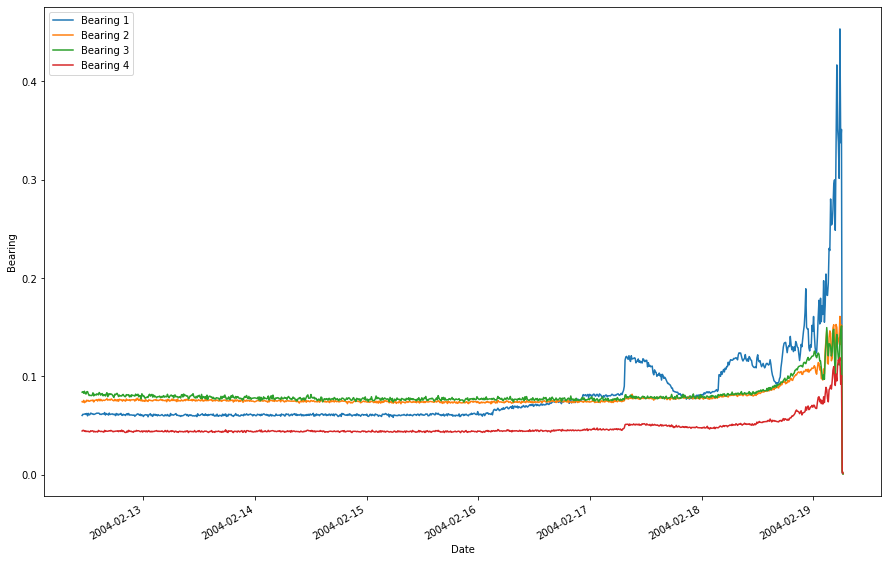

In [8]:
# visualizing the bearing data

new_df.plot(figsize=(15, 10))
plt.xlabel("Date")
plt.ylabel("Bearing")

<AxesSubplot:ylabel='Bearing 4'>

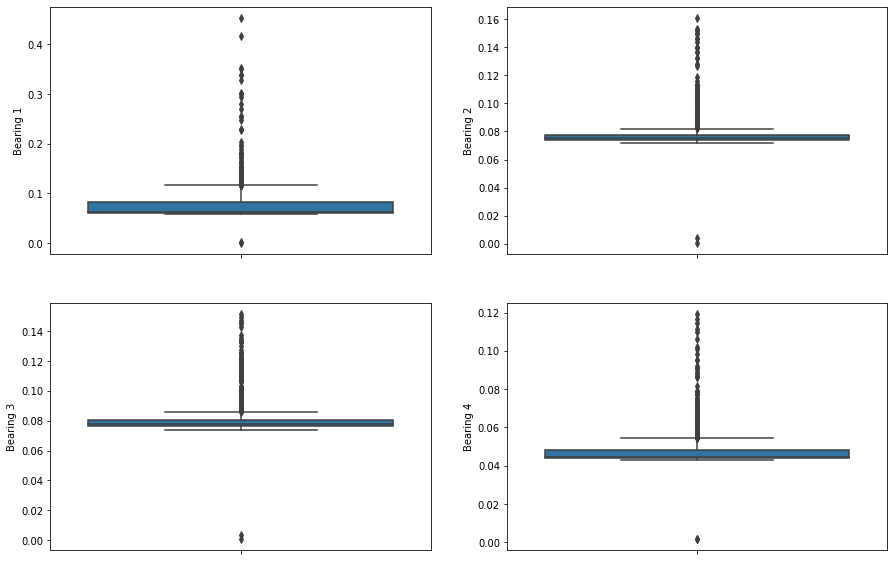

In [9]:
# visualizing distributions of data using box plot

fig, axis = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(y=new_df['Bearing 1'], ax=axis[0,0])
sns.boxplot(y=new_df['Bearing 2'], ax=axis[0,1])
sns.boxplot(y=new_df['Bearing 3'], ax=axis[1,0])
sns.boxplot(y=new_df['Bearing 4'], ax=axis[1,1])

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

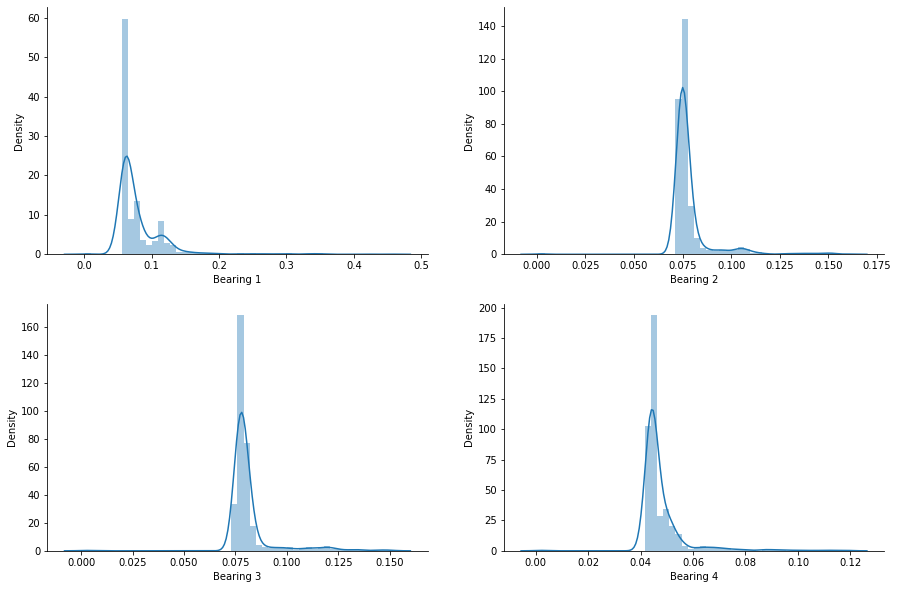

In [10]:
# visualizing distributions of data using distribution plot

fig, axis = plt.subplots(2, 2, figsize=(15, 10))

sns.distplot(new_df['Bearing 1'], ax=axis[0,0])
sns.distplot(new_df['Bearing 2'], ax=axis[0,1])
sns.distplot(new_df['Bearing 3'], ax=axis[1,0])
sns.distplot(new_df['Bearing 4'], ax=axis[1,1])
sns.despine()

From the graph above, it can be seen that the data has outliers

# fit multivariate time-series using VAR (Vector Auto-Regression) model

Vector Autoregression (VAR) is a forecasting algorithm that can be used when two or more time series influence each other.

In [11]:
# finding the best lag number from the smallest aic value

aic_min = 999999
lag = 0

for i in range(10):
    model = VAR(new_df)
    var_result = model.fit(maxlags=i)
    AIC = var_result.aic
    
    if AIC < aic_min:
        aic_min = AIC
        lag = i
        
print('Lag:', lag)
print('AIC:', aic_min)

Lag: 9
AIC: -49.097007294369995


The best order for the lag is 9, which gives the minimum AIC value -49.097 for the model.

In [12]:
# fit the VAR model with selected lag number which is 9

var = VAR(new_df)
var_result = var.fit(maxlags=lag)

In [13]:
# find the anomaly data using squared errors

def detect_anomaly(squared_errors):
    threshold = np.mean(squared_errors) + np.std(squared_errors)
    predictions = (squared_errors >= threshold).astype(int)
    # the squared errors above the threshold can be considered as anomalies
    return predictions, threshold

In [14]:
# calculate squared residual (errors) of each data/row for finding the threshold

squared_errors = var_result.resid.sum(axis=1) ** 2
predictions, threshold = detect_anomaly(squared_errors)
print("Threshold value is ", threshold)

Threshold value is  0.0008569346163057213


In [15]:
selected_data = new_df.iloc[lag:, :].copy()
selected_data['Prediction'] = predictions.values
selected_data['Prediction'].value_counts()

0    947
1     26
Name: Prediction, dtype: int64

There are 26 data detected as anomalies by the model.

In [16]:
# display data that is considered as anomaly

selected_data[selected_data['Prediction'] == 1]

,Bearing 1,Bearing 2,Bearing 3,Bearing 4,Prediction
2004-02-17 07:32:39,0.116489,0.077491,0.080992,0.050848,1
2004-02-17 08:52:39,0.121011,0.077503,0.078685,0.051004,1
2004-02-18 20:32:39,0.129939,0.103161,0.106589,0.064477,1
2004-02-18 22:22:39,0.189086,0.106937,0.112925,0.069001,1
2004-02-18 22:32:39,0.149938,0.106622,0.115555,0.065636,1
2004-02-18 22:52:39,0.148384,0.107330,0.119264,0.069865,1
2004-02-18 23:02:39,0.129035,0.104226,0.116374,0.066105,1
2004-02-18 23:52:39,0.145859,0.108005,0.120645,0.068641,1
2004-02-19 00:22:39,0.129449,0.109216,0.125216,0.068337,1
2004-02-19 01:22:39,0.153324,0.106464,0.115636,0.074150,1


c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\pandas-1.2.2-py3.7-win-amd64.egg\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\pandas-1.2.2-py3.7-win-amd64.egg\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\pandas-1.2.2-py3.7-win-amd64.egg\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.g

Text(0, 0.5, 'Bearing 4')

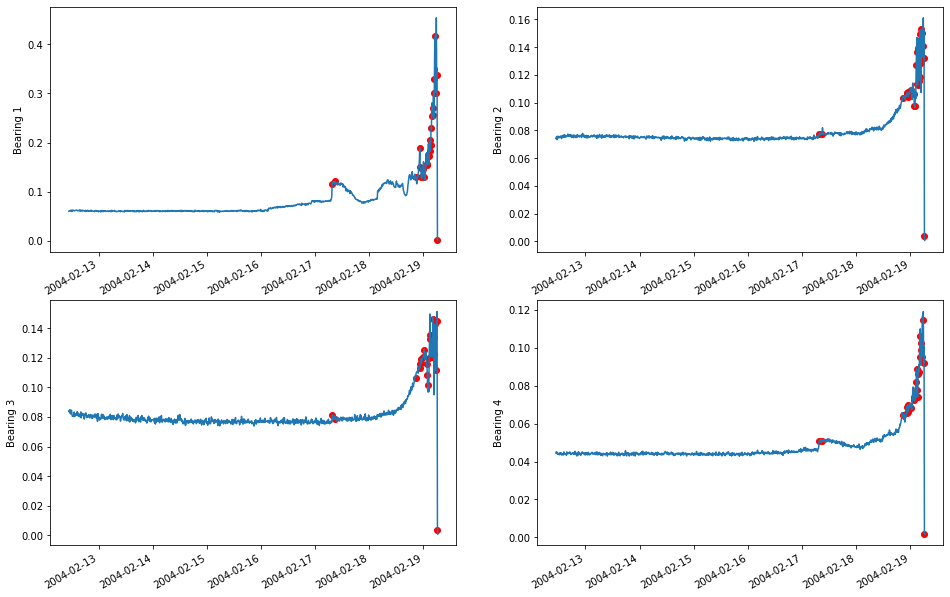

In [17]:
# visualizing the anomalies data

fig, axis = plt.subplots(2, 2, figsize=(16, 11))

idx = selected_data[selected_data['Prediction'] == 1].index

new_df['Bearing 1'].plot(ax=axis[0,0])
axis[0,0].scatter(new_df.loc[idx].index, new_df['Bearing 1'].loc[idx], c="red")
axis[0,0].set_ylabel("Bearing 1")

new_df['Bearing 2'].plot(ax=axis[0,1])
axis[0,1].scatter(new_df.loc[idx].index, new_df['Bearing 2'].loc[idx], c="red")
axis[0,1].set_ylabel("Bearing 2")

new_df['Bearing 3'].plot(ax=axis[1,0])
axis[1,0].scatter(new_df.loc[idx].index, new_df['Bearing 3'].loc[idx], c="red")
axis[1,0].set_ylabel("Bearing 3")

new_df['Bearing 4'].plot(ax=axis[1,1])
axis[1,1].scatter(new_df.loc[idx].index, new_df['Bearing 4'].loc[idx], c="red")
axis[1,1].set_ylabel("Bearing 4")